In [1]:
import matplotlib.pyplot as plt
from seaborn import axes_style
from sympy.external.gmpy import invert
from win32comext.adsi.demos.scp import verbose

In [2]:
import kagglehub

path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\kozub\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1


In [3]:
import os
from PIL import Image
import numpy as np


def load_images_from_folders(base_folder, target_size=(512, 512)):
    images = []
    for subfolder in os.listdir(base_folder):
        subfolder_path = os.path.join(base_folder, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = Image.open(img_path).convert('L')
                if img is not None:
                    img = resize_with_padding(img, target_size)
                    images.append(np.array(img))
    return np.array(images)


def resize_with_padding(img, target_size):
    original_size = img.size
    ratio = min(target_size[0] / original_size[0], target_size[1] / original_size[1])
    new_size = (int(original_size[0] * ratio), int(original_size[1] * ratio))
    img = img.resize(new_size, Image.Resampling.LANCZOS)

    new_img = Image.new("L", target_size)
    new_img.paste(img, ((target_size[0] - new_size[0]) // 2, (target_size[1] - new_size[1]) // 2))
    return new_img


train_path = os.path.join(path, "Training")
test_path = os.path.join(path, "Testing")

train_images = load_images_from_folders(train_path)
test_images = load_images_from_folders(test_path)

In [4]:
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = train_images.reshape((train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
test_images = test_images.reshape((test_images.shape[0], test_images.shape[1], test_images.shape[2], 1))

In [5]:
train_images.shape

(5712, 512, 512, 1)

In [6]:
test_images.shape

(1311, 512, 512, 1)

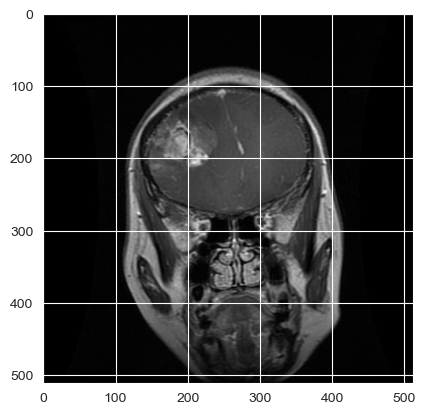

In [7]:
# show image without axes
plt.imshow(train_images[0], cmap='gray')

In [8]:
def add_noise(images, noise_factor=0.3, batch_size=100):
    noisy_images = np.empty_like(images)
    num_batches = len(images) // batch_size + (1 if len(images) % batch_size != 0 else 0)

    for i in range(num_batches):
        print(i, num_batches)
        start = i * batch_size
        end = min((i + 1) * batch_size, len(images))
        batch = images[start:end]
        noisy_batch = batch + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=batch.shape)
        noisy_images[start:end] = np.clip(noisy_batch, 0., 1.)

    return noisy_images


train_images_noisy = add_noise(train_images, noise_factor=0.3, batch_size=100)
test_images_noisy = add_noise(test_images, noise_factor=0.3, batch_size=100)

0 58
1 58
2 58
3 58
4 58
5 58
6 58
7 58
8 58
9 58
10 58
11 58
12 58
13 58
14 58
15 58
16 58
17 58
18 58
19 58
20 58
21 58
22 58
23 58
24 58
25 58
26 58
27 58
28 58
29 58
30 58
31 58
32 58
33 58
34 58
35 58
36 58
37 58
38 58
39 58
40 58
41 58
42 58
43 58
44 58
45 58
46 58
47 58
48 58
49 58
50 58
51 58
52 58
53 58
54 58
55 58
56 58
57 58
0 14
1 14
2 14
3 14
4 14
5 14
6 14
7 14
8 14
9 14
10 14
11 14
12 14
13 14


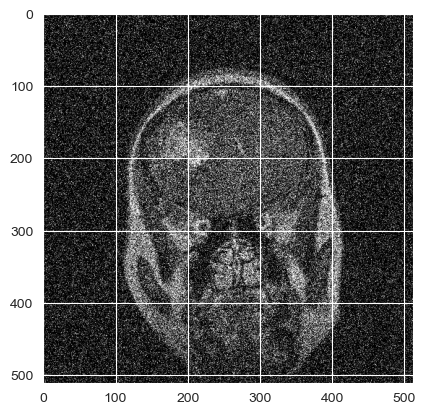

In [9]:
plt.imshow(train_images_noisy[0], cmap='gray')


In [10]:
def save_images(images, folder):
    if not os.path.exists(folder):
        os.makedirs(folder)
    for i, img in enumerate(images):
        img = (img * 255).astype(np.uint8)
        img = Image.fromarray(img.squeeze(), mode='L')
        img.save(os.path.join(folder, f'image_{i}.png'))

# Save preprocessed images
save_images(train_images, 'data/preprocessed_train_images')
save_images(test_images, 'data/preprocessed_test_images')

# Save noisy images
save_images(train_images_noisy, 'data/noisy_train_images')
save_images(test_images_noisy, 'data/noisy_test_images')